# PHYS247 Project Restaurant Revenue Prediction
## Predict annual restaurant sales based on objective measurements

## Step 1: Read data from train.csv file

In [154]:
# import necessary libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# sklearn library imports.

from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import SGDRegressor,ARDRegression,Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor


from sklearn.metrics import  mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime

sns.set()


In [ ]:
# upload train.csv file
from google.colab import files
uploaded = files.upload()


# upload test.csv file
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


Saving test.csv to test.csv


In [155]:
# Now read both csv files and store them into dataframe
restaurant_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")

In [156]:
# check restaurant data frame
restaurant_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [157]:
# check test data frame
test_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


In [158]:
# get shape of both train and test data
restaurant_df.shape

(137, 43)

In [159]:
# check shape of test data
test_df.shape

(100000, 42)

In [160]:
# get info from data
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [161]:
# check null from data 
restaurant_df.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

### Basic Data observation

*   Based on dataframe, training data is not much available compare to test data. It has around 42 dimensions [features] where revenue can be predicted.
*   Test data is around 10K items and revenue needs to be predicted. so features are the same but 1 target (revenue) column is filled by regression model.
*    Training data seems clean. i.e no null or None values in any of the columns.
* Training data however has some data type mismatched with int64 with float64. These features has to convert into int64 or float64 type.
* Training data can be categorized into main categories 1) Numeric data ( all P colums P1,P2...P37,revenue,Id) 2) Categorical data ( City, City Group, Type)  3) Date data ( Open Date)
* Id columns is unique identification number and It *does not* use in predicting revenue. we can simply drop this column.
* Categorical data can not be feed into model, we need to convert into numerical data by using techinque called **one hot encoding**.
* Before feeding data to model, all the features should be normalized. for this process we will use **Standerd Scaler**. There are also other normalization methods are available.
* For features, here are the sort descriptions of features.
  * Id : Restaurant id. 
  * Open Date : opening date for a restaurant
  * City : City that the restaurant is in. Note that there are unicode in the names. 
  * City Group: Type of the city. Big cities, or Other. 
  * Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
  * P1, P2 - P37: There are three categories of these obfuscated data
  * Revenue: The revenue column indicates a (transformed) revenue.




## Step 2: Exploratory Data Analysis(EDA)
### In this step we will explore and visualize data before cleaning and formatting.

In [162]:
# describe the data
restaurant_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,137.0,6.800000e+01,3.969257e+01,0.0,34.0,68.0,102.0,136.0
P1,137.0,4.014599e+00,2.910391e+00,1.0,2.0,3.0,4.0,12.0
P2,137.0,4.408759e+00,1.514900e+00,1.0,4.0,5.0,5.0,7.5
P3,137.0,4.317518e+00,1.032337e+00,0.0,4.0,4.0,5.0,7.5
P4,137.0,4.372263e+00,1.016462e+00,3.0,4.0,4.0,5.0,7.5
P5,137.0,2.007299e+00,1.209620e+00,1.0,1.0,2.0,2.0,8.0
P6,137.0,3.357664e+00,2.134235e+00,1.0,2.0,3.0,4.0,10.0
P7,137.0,5.423358e+00,2.296809e+00,1.0,5.0,5.0,5.0,10.0
P8,137.0,5.153285e+00,1.858567e+00,1.0,4.0,5.0,5.0,10.0
P9,137.0,5.445255e+00,1.834793e+00,4.0,4.0,5.0,5.0,10.0


In [163]:
# convert float64 to int64
decimal_convert_columns =  ["P2","P3","P4","P13","P26","P27","P28","P29"]
for col in decimal_convert_columns:
  restaurant_df[col] = restaurant_df[col].apply(lambda x: int(x))

  # do the same with test data
  test_df[col] = test_df[col].apply(lambda x: int(x))





In [164]:
# check unique values for categorical data
# City in train
print(restaurant_df["City"].unique())

# City in test
print(test_df["City"].unique())


['İstanbul' 'Ankara' 'Diyarbakır' 'Tokat' 'Gaziantep' 'Afyonkarahisar'
 'Edirne' 'Kocaeli' 'Bursa' 'İzmir' 'Sakarya' 'Elazığ' 'Kayseri'
 'Eskişehir' 'Şanlıurfa' 'Samsun' 'Adana' 'Antalya' 'Kastamonu' 'Uşak'
 'Muğla' 'Kırklareli' 'Konya' 'Karabük' 'Tekirdağ' 'Denizli' 'Balıkesir'
 'Aydın' 'Amasya' 'Kütahya' 'Bolu' 'Trabzon' 'Isparta' 'Osmaniye']
['Niğde' 'Konya' 'Ankara' 'Kocaeli' 'Afyonkarahisar' 'Eskişehir' 'Rize'
 'İstanbul' 'Trabzon' 'Antalya' 'Muğla' 'Düzce' 'Adana' 'Bursa' 'Aydın'
 'Hatay' 'Denizli' 'İzmir' 'Gaziantep' 'Samsun' 'Erzurum' 'Edirne'
 'Balıkesir' 'Mersin' 'Zonguldak' 'Malatya' 'Çanakkale' 'Kars' 'Bolu'
 'Batman' 'Bilecik' 'Giresun' 'Tekirdağ' 'Sivas' 'Kırıkkale' 'Mardin'
 'Erzincan' 'Manisa' 'Diyarbakır' 'Kahramanmaraş' 'Yalova' 'Tanımsız'
 'Sakarya' 'Kırşehir' 'Aksaray' 'Kayseri' 'Nevşehir' 'Çorum' 'Ordu'
 'Kırklareli' 'Şanlıurfa' 'Artvin' 'Uşak' 'Kütahya' 'Siirt' 'Çankırı'
 'Isparta']


In [165]:
# Type in train
print(restaurant_df["Type"].unique())

# Type in test
print(test_df["Type"].unique())

['IL' 'FC' 'DT']
['FC' 'IL' 'DT' 'MB']


In [166]:
# City Group in train
print(restaurant_df["City Group"].unique())

# City Group in test
print(test_df["City Group"].unique())

['Big Cities' 'Other']
['Other' 'Big Cities']


#### Observing above results, we can conclude following points


*   Test data has **more** City examples, train data is missing certain cities like Ordu,Çorum,Nevşehir etc.
*   Test data has **more** types of restaurant.for example, **MB** type of data completly missing from training data.



In [167]:
# Define feature type
countinue_variable_colums =["P{}".format(x) for x in range(1,38)]
categorial_coulumns = ["City","City Group","Type"]


In [168]:
# Convert Open Date to numerical variable

# First convert to date type
restaurant_df['Open Date'] = restaurant_df['Open Date'].astype('datetime64[ns]')
test_df['Open Date'] = test_df['Open Date'].astype('datetime64[ns]')

refernce_date = datetime.strptime('2015-09-30', '%Y-%m-%d')

# convert date to days for training data
restaurant_df['Open Days']= refernce_date - restaurant_df['Open Date']
restaurant_df['Open Days']= restaurant_df['Open Days'].dt.days

# convert date to days for test data
test_df['Open Days']= refernce_date - test_df['Open Date']
test_df['Open Days']= test_df['Open Days'].dt.days


# add this to continues variable value
countinue_variable_colums.append("Open Days")

In [169]:
# For EDA, Define necessary functions.
def plot_categorial_count(category,horizontal=2, verticle=2):
    figure, ax = plt.subplots(horizontal, verticle, figsize=(25, 25))
    for cat, subplot in zip(category, ax.flatten()):
        sns.countplot(y=cat, data=restaurant_df, ax=subplot,orient="h",edgecolor="k")


def plot_countinue_variable_colums(category,horizontal=13, verticle=3):
    figure, ax = plt.subplots(horizontal, verticle, figsize=(25, 25))
    for var, subplot in zip(category, ax.flatten()):
        sns.distplot(restaurant_df[var], ax=subplot,bins=5, color="blue")

def plot_box_plots_for_numeric_variable(category,horizontal=13, verticle=3):
    figure, ax = plt.subplots(horizontal, verticle, figsize=(20, 20))
    for var, subplot in zip(category, ax.flatten()):
      sns.boxplot(x=var, data=restaurant_df, ax=subplot)

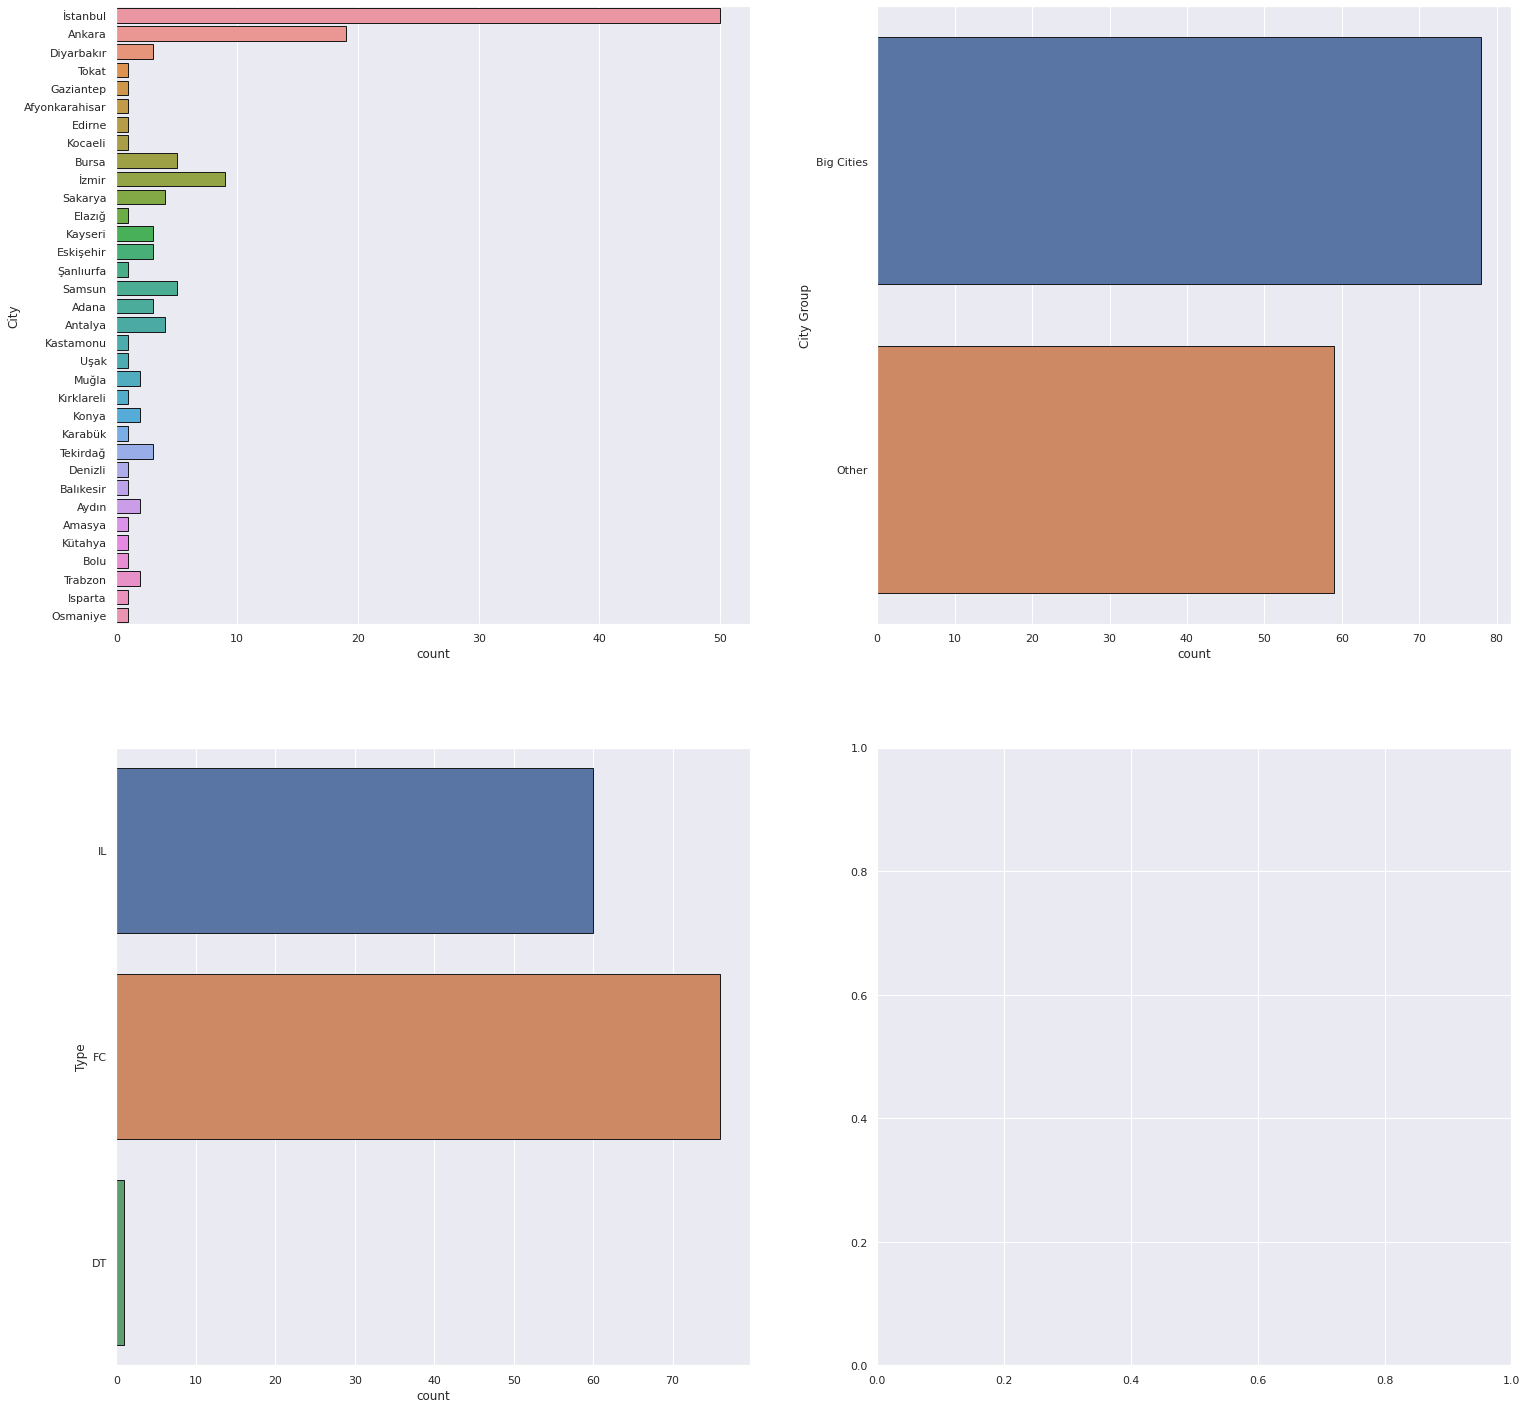

In [170]:
# plot visualization for categorial variables
plot_categorial_count(categorial_coulumns)

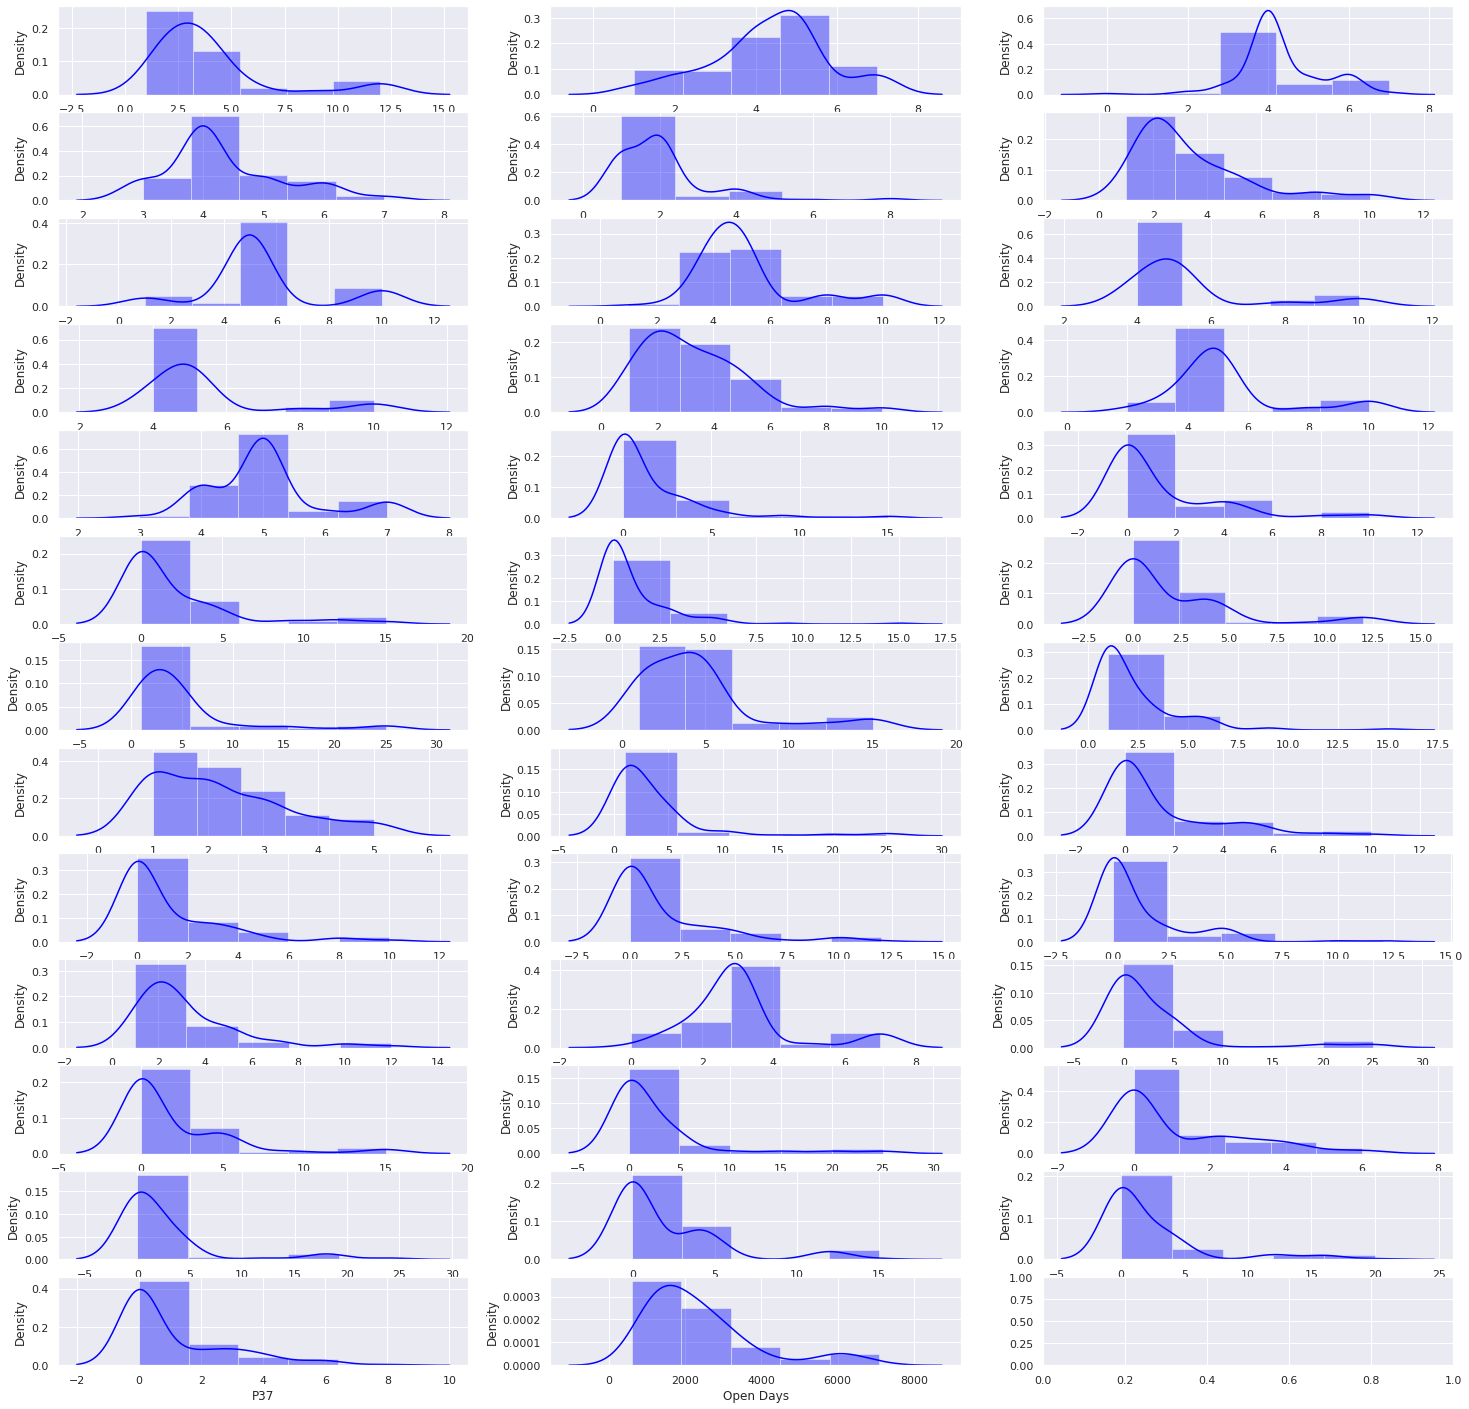

In [171]:
# plot visualization for continue variables
plot_countinue_variable_colums(countinue_variable_colums)

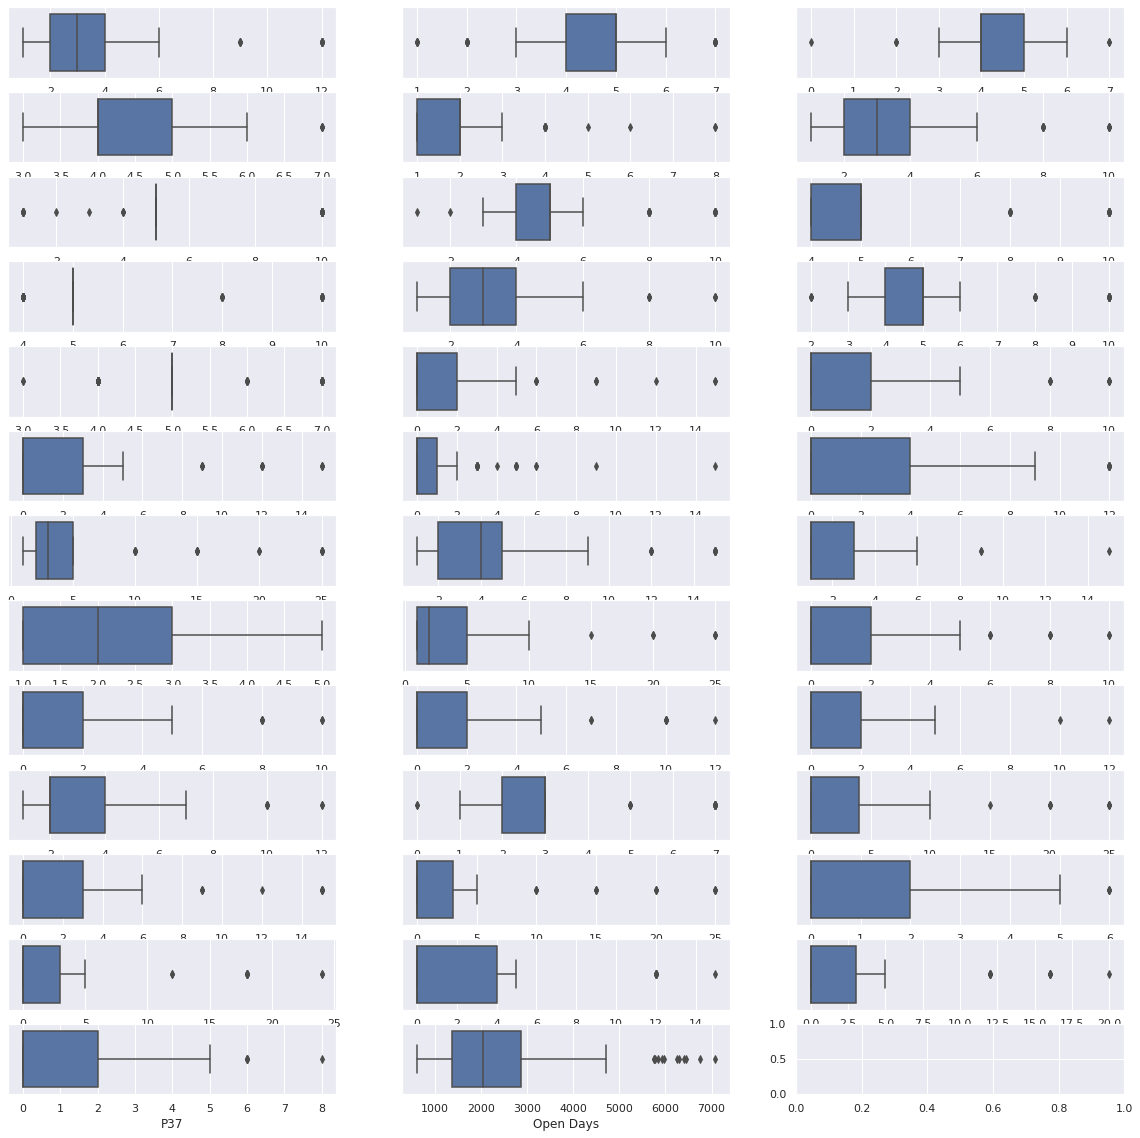

In [172]:
# box plot for numeric variables
plot_box_plots_for_numeric_variable(countinue_variable_colums)

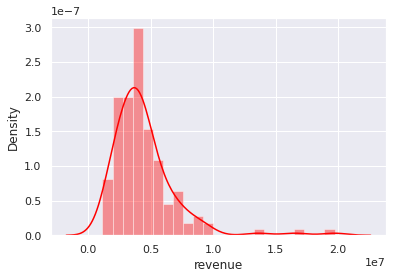

In [173]:
# plot for revenue
sns.distplot(restaurant_df["revenue"], color="red");

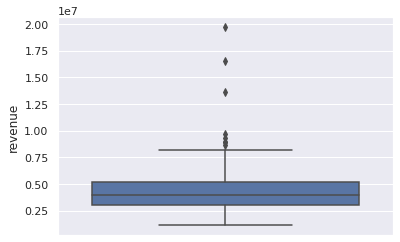

In [174]:
# box plot for revenue
sns.boxplot(y=restaurant_df['revenue']);

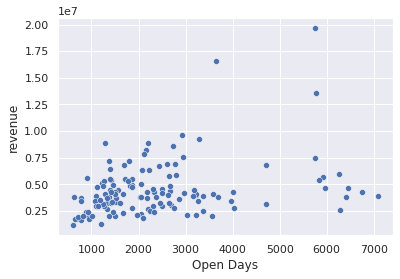

In [175]:
# Scatter plot with Open date 
sns.scatterplot(x=restaurant_df['Open Days'], y=restaurant_df['revenue']);

## Exploratory Data Analysis(EDA)



---
* This is a classic regression problem where need to predict *revenue*  based on other features.
* Training data is way lesser than test data, need so we may not use deep learning based models.
* Features are combination of category and numeric data. so, need to convert all categorial data to numeric value.
    * Categorial data: 
      * City: There are less cities in training data then the test data, majority training data sampled from Istanbul and Ankara.Data distribution of City is highly skewed. Data of this feature looks clean (uniform value, not null value).
      * City Group: This feature has mainly two categories 1) Big City 2) Others. Data in this features seems clean and uniformly distributed.
      * Type: This feature is the *most challenging* feature for mainly two primary reasons 1) In training data **MB** category is missing. This category is present in test data. 2) There is only one example for **DT** category in training data. For this situation we will use SMOTE or KNN to get more data or generate more training data examples.
    * Numerical data:
      * P1..P37: This is some composite features that has int64 values. We converted some of the features into int64 from float64.
      * revenue: By looking at data visualization, we can see some outliers in revenue. we need to remove these outliers.
      * Open Date: This is a date formatted data. we converted this data into numbers of days from a reference date.This refence date is selected based on ROUND(MAX(Open Date)). i.e nearest ceil value for the latest opened restaurant. For example if latest opening date among the data is 03/16/2021 then reference date would be that data set 03/31/2021 and Days will be count based on this date.if restaurant opened 03/31/2020 then Open days will be 365. In that way we can convert all date data into some numbers.
* By looking at distribution plot and box plot, we can see most of the numerical features are not uniformly distributed. most of them are positively skewed. 
* Since data distribution range is different for each feature, we need some standardization in preprocessing steps.
* This is a high dimension data, we need to reduce features based on its correlation with revenue.
* Most of the restaurants are relatively old based on their opening dates in training data.





## Step 3: Preprocessing and Feature Engineering
### generally Feature Engineering and Preprocessing are seprate steps.but for this data set we will combined these two steps.


In [176]:
# Preprocessing: Remove outliers

# Checking for outliers
Q1 = restaurant_df['revenue'].quantile(0.25)
Q3 = restaurant_df['revenue'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((restaurant_df['revenue'] < (Q1 - 3.5*IQR))|(restaurant_df['revenue']>(Q3 +3.5*IQR))).sum(axis=0)
print("Total outliers based on revenue is:{}".format(outliers))

# now check this outliers in columns
restaurant_df[restaurant_df['revenue']>12500000]

Total outliers based on revenue is:3


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Days
16,16,2000-01-07,İstanbul,Big Cities,FC,3,5,4,4,2,5,5,4,5,4,3,5,4,0,0,0,0,0,1,4,1,1,1,0,0,0,0,2,2,0,0,0,0,0,0,0,0,19696939.0,5745
75,75,2005-10-15,İstanbul,Big Cities,FC,5,5,4,5,1,4,5,3,4,4,5,3,4,0,0,0,0,0,5,5,5,5,4,0,0,0,0,5,0,0,0,0,0,0,0,0,0,16549064.0,3637
99,99,1999-12-18,İstanbul,Big Cities,IL,4,5,4,4,2,4,5,4,4,4,5,3,4,5,5,5,5,5,5,5,5,3,1,5,5,5,1,5,1,5,5,4,2,5,5,5,3,13575224.0,5765


In [177]:
# Remove outliers from dataframe
restaurant_df = restaurant_df[restaurant_df['revenue']<12500000]

In [178]:
print("count of ouliers after removing them: {}".format(restaurant_df[restaurant_df['revenue']>12500000].count().sum()))

count of ouliers after removing them: 0


In [179]:
# Preprocessing: One Hot Encoding
# In this step we will convert all categorical data to numerical data

# One big issue is the city name, there are 34 unique city in training data and it will add 34 more dimensions by one hot 
# coding, so we will use top 7 most frequent cities and rest of the city we marked as "Other", By this technique, data dimension will increase by 8 instead of 34.

city_name= ['İstanbul', 'Ankara', 'İzmir', 'Samsun', 'Bursa', 'Sakarya', 'Antalya']
def change_city_name(x):
  if x in city_name:
    return x
  else:
    return "Other"

restaurant_df["City"] = restaurant_df["City"].apply(change_city_name)
test_df["City"] = test_df["City"].apply(change_city_name)

In [180]:
# check the new city count value
restaurant_df['City'].value_counts()

İstanbul    47
Other       41
Ankara      19
İzmir        9
Samsun       5
Bursa        5
Sakarya      4
Antalya      4
Name: City, dtype: int64

In [181]:
# Use one hot encoding for convert City to features
restaurant_df = pd.get_dummies(restaurant_df,columns=["City"])

# same compute for test data frame
test_df = pd.get_dummies(test_df,columns=["City"])



In [182]:
# Use one hot encoding for City Groups
restaurant_df = pd.get_dummies(restaurant_df,columns=["City Group"])

# same compute for test data frame
test_df = pd.get_dummies(test_df,columns=["City Group"])

In [183]:
# check df
restaurant_df.head()

,Id,Open Date,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Days,City_Ankara,City_Antalya,City_Bursa,City_Other,City_Sakarya,City_Samsun,City_İstanbul,City_İzmir,City Group_Big Cities,City Group_Other
0,0,1999-07-17,IL,4,5,4,4,2,2,5,4,5,5,3,5,5,1,2,2,2,4,5,4,1,3,3,1,1,1,4,2,3,5,3,4,5,5,4,3,4,5653753.0,5919,0,0,0,0,0,0,1,0,1,0
1,1,2008-02-14,FC,4,5,4,4,1,2,5,5,5,5,1,5,5,0,0,0,0,0,3,2,1,3,2,0,0,0,0,3,3,0,0,0,0,0,0,0,0,6923131.0,2785,1,0,0,0,0,0,0,0,1,0
2,2,2013-03-09,IL,2,4,2,5,2,3,5,5,5,5,2,5,5,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,3,0,0,0,0,0,0,0,0,2055379.0,935,0,0,0,1,0,0,0,0,0,1
3,3,2012-02-02,IL,6,4,6,6,4,4,10,8,10,10,8,10,7,6,4,9,3,12,20,12,6,1,10,2,2,2,2,2,7,25,12,10,6,18,12,12,6,2675511.0,1336,0,0,0,1,0,0,0,0,0,1
4,4,2009-05-09,IL,3,4,3,4,2,2,5,5,5,5,2,5,5,2,1,2,1,4,2,2,1,2,1,2,3,3,5,1,3,5,1,3,2,3,4,3,3,4316715.0,2335,0,0,0,1,0,0,0,0,0,1


### By observing above dataframe 
* Most of the categorical columns are converted to numerical value by *one hot encoding* 
* **Type** is missing values in training data, i.e *MB* is completly missing and *DT* has under sample value. We can trackle this problem by 2 ways. 
  * By usning KNN, Take sample KNN data from test data set.
  * By generating sythetic data technique called "SMOTE".
* SMOTE is good for classification imbalance class problem, We will use KNN for get TYPE=DT data from test dataframe and insert to training data set.
* Similarly we can also insert some MB data from test to tarining example.


In [184]:
# copy restaturent df to train df 
train_df = restaurant_df.copy()

In [185]:
def get_knn_for_train_data(s_type,d_type,k=5):
  knn_train_df = train_df[train_df["Type"] == s_type]
  knn_train_df.drop(columns=["Id","Open Date","revenue"],inplace=True)
  knn_train_df = pd.get_dummies(knn_train_df,columns=["Type"])
  #knn_train_df.shape
  knn = NearestNeighbors(n_neighbors=k)
  knn_test_df = test_df.drop(columns=["Id","Open Date"])
  knn_test_df.head()
  knn_test_df = pd.get_dummies(knn_test_df,columns=["Type"])
  #knn_test_df  = knn_test_df[knn_test_df["Open Days"].notna()]
  knn_test_df = knn_test_df[knn_test_df["Type_{}".format(d_type)] == 1]

  knn_test_df.drop(columns=["Type_MB","Type_FC","Type_IL"],inplace=True)
  knn.fit(knn_test_df)
  knn_index = knn.kneighbors(knn_train_df)[1][0]
  return knn_index

In [186]:
knn_index_dt = get_knn_for_train_data("DT","DT")
knn_index_mb = get_knn_for_train_data("FC","MB")

In [187]:
# check index for DT to be inserted into training
knn_index_dt

array([ 848,  480, 1440, 2196,  265])

In [188]:
# check index for MB to be inserted into training.
knn_index_mb

array([199, 222, 181,  10, 116])

In [189]:
# data insert function.
def insert_data_to_training(src_num,dst_num, r_type):
  tmp_df = test_df.iloc[src_num]
  # Add revenue bias for big cities.
  if tmp_df["City Group_Big Cities"] == 1:
    tmp_df['revenue'] = train_df['revenue'].mean() + 1181438 + random.randint(10000,100000)
  else:
    tmp_df['revenue'] = train_df['revenue'].mean() + random.randint(10000,100000)
  tmp_df['Type'] = r_type
  tmp_df['Open Days'] = int(train_df['Open Days'].mean())
  train_df.loc[dst_num] = tmp_df



In [190]:
# now insert DT data found by KNN to training data
end_index_training_dt = 137
for i in knn_index_dt:
  insert_data_to_training(i,end_index_training_dt,"DT")
  end_index_training_dt = end_index_training_dt + 1


end_index_training_mb = 142
for i in knn_index_mb:
  insert_data_to_training(i,end_index_training_mb,"MB")
  end_index_training_mb = end_index_training_mb + 1


In [191]:
# Now check training dataframe for type
train_df["Type"].value_counts()

FC    74
IL    59
DT     6
MB     5
Name: Type, dtype: int64

### By observing above result, it seems we inserted data into training by using KNN technique from test data frame.

In [192]:
# By using one hot encoding convert type to numeric value
train_df = pd.get_dummies(train_df,columns=["Type"])
test_df = pd.get_dummies(test_df,columns=["Type"])

In [193]:
# Drop Id and Open Date from both dataframe
train_df.drop(["Id","Open Date"],inplace=True,axis=1)
test_df.drop(["Id","Open Date"],inplace=True,axis=1)

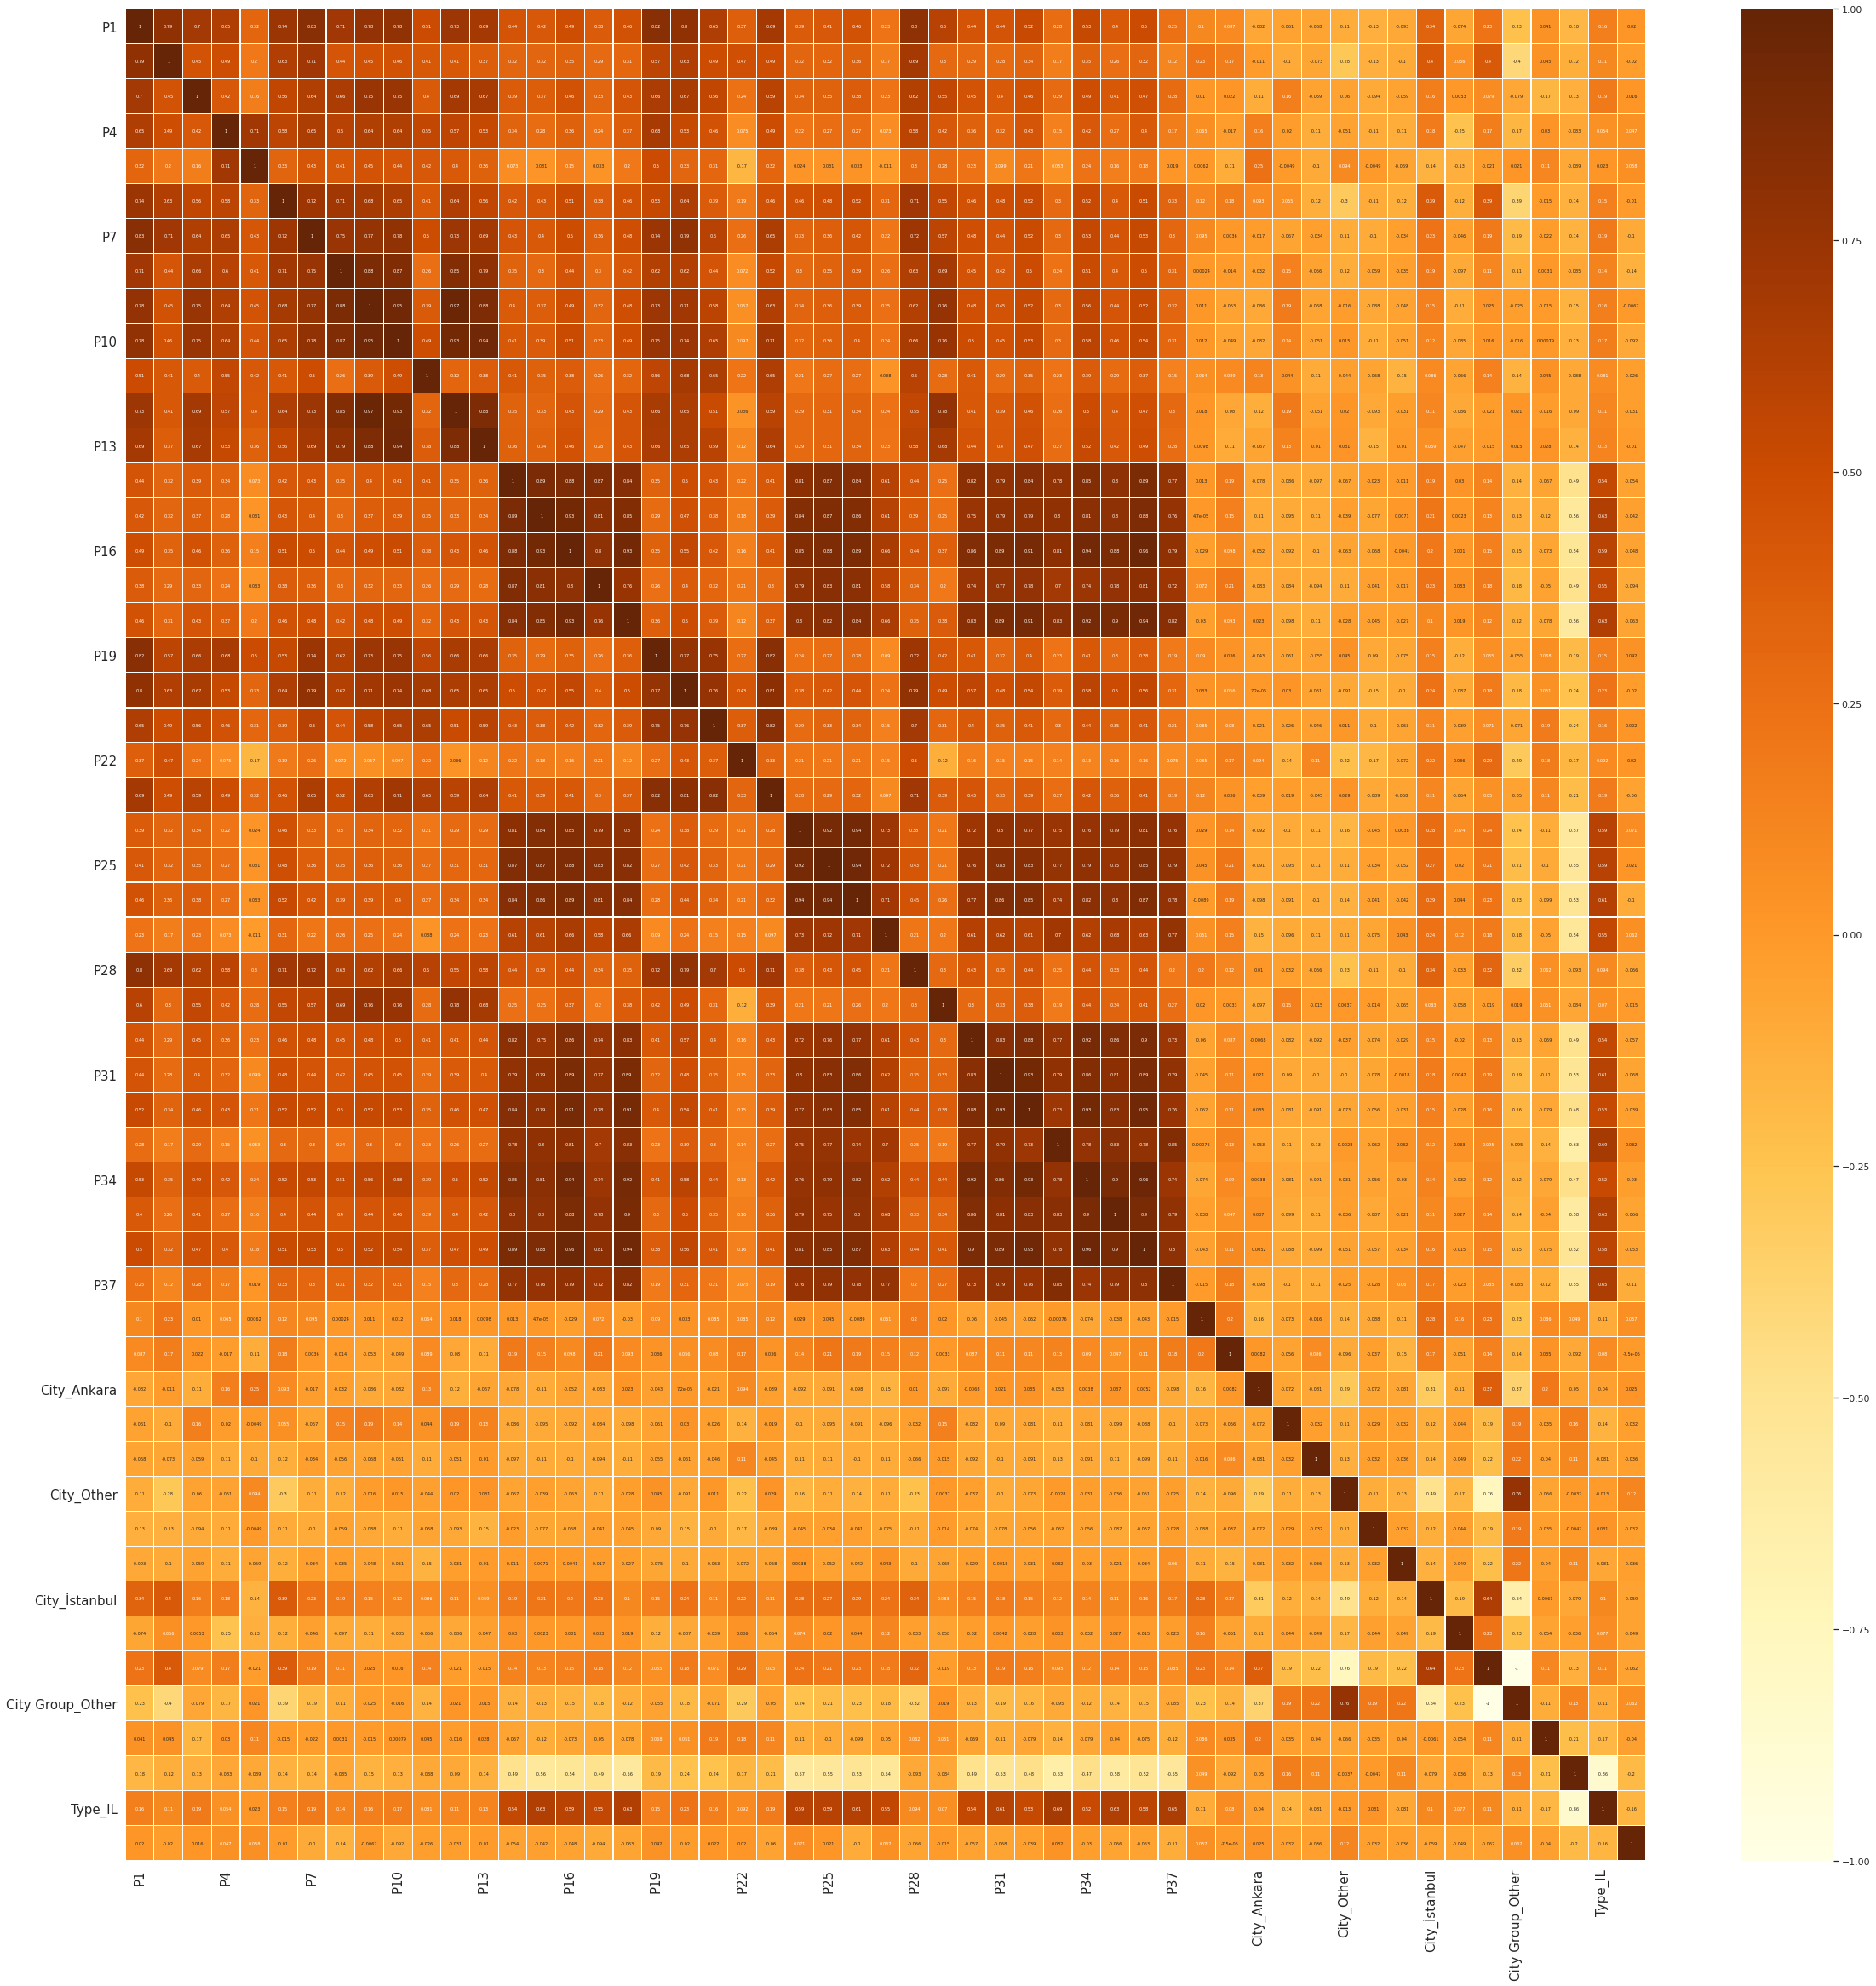

In [194]:
# Now data should be completly nuemrical and ready to train. before that we need to check for correlation
# Create Correlation Heat map for finding The most relevent feature
corr = train_df.corr()
sns.heatmap(corr,annot=True,cmap='YlOrBr',linewidths=0.2,annot_kws={'size':5})
fig=plt.gcf()
fig.set_size_inches(40,40)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [195]:
# Find Top feature which has strong correlation with revenue
abs(train_df.corr())['revenue'].sort_values(ascending=False).head(15)

revenue                  1.000000
City_İstanbul            0.279945
City Group_Other         0.227358
City Group_Big Cities    0.227358
P2                       0.226193
P28                      0.200568
Open Days                0.198933
City_Ankara              0.161412
City_İzmir               0.155253
City_Other               0.137749
P23                      0.123433
P6                       0.115751
City_Samsun              0.107294
Type_IL                  0.106593
P1                       0.104973
Name: revenue, dtype: float64

In [196]:
train_df.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Days,City_Ankara,City_Antalya,City_Bursa,City_Other,City_Sakarya,City_Samsun,City_İstanbul,City_İzmir,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL,Type_MB
0,4,5,4,4,2,2,5,4,5,5,3,5,5,1,2,2,2,4,5,4,1,3,3,1,1,1,4,2,3,5,3,4,5,5,4,3,4,5653753.0,5919,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1,4,5,4,4,1,2,5,5,5,5,1,5,5,0,0,0,0,0,3,2,1,3,2,0,0,0,0,3,3,0,0,0,0,0,0,0,0,6923131.0,2785,1,0,0,0,0,0,0,0,1,0,0,1,0,0
2,2,4,2,5,2,3,5,5,5,5,2,5,5,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,3,0,0,0,0,0,0,0,0,2055379.0,935,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,6,4,6,6,4,4,10,8,10,10,8,10,7,6,4,9,3,12,20,12,6,1,10,2,2,2,2,2,7,25,12,10,6,18,12,12,6,2675511.0,1336,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,3,4,3,4,2,2,5,5,5,5,2,5,5,2,1,2,1,4,2,2,1,2,1,2,3,3,5,1,3,5,1,3,2,3,4,3,3,4316715.0,2335,0,0,0,1,0,0,0,0,0,1,0,0,1,0


### Preprocessing and Feature Engineering Notes
* After preprocessing and feature engineering, data is ready for train regression model and evalute them. 
* Missing data was filled by using KNN from test data sets.
* After data processing data dimension was increased since all categorical data converted into numerical data by one hot encoding.
* Correlation heatmap shows revenue v/s features correlation, In case of higher dimension, we can select the feature based on strong correlation with revenue.
* City_İstanbul,P2, City Group_Other,Open Days,City_Ankara,P28 these are top 5 features that has strong correlation with revenue.


## Step 4: Model Training and Evaluation.
### In this step we will train various regression model for data and 

In [197]:
y = train_df[['revenue']]
X = train_df.drop("revenue", axis=1)

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=22, test_size=0.2)

reg = XGBRegressor()
reg.fit(X,y)

[23:42:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [198]:
# define X,y X as all features, y as target.

y = train_df[['revenue']]
X = train_df.drop("revenue", axis=1)


# Split into training, testing sets. 80%-20% data with random state 22.
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=22, test_size=0.2)


# function for fit and compare various regression models

def train_and_get_score(model,X,y,X_train,X_test,y_train,y_test):
  model.fit(X,y)
  pred = model.predict(X_test)
  mse = mean_absolute_error(y_test,pred)
  rmse = np.sqrt(mean_squared_error(y_test,pred))
  r2 = r2_score(y_test,pred)
  return mse,rmse,r2


# define various regressor models.
regression_models = {"Linear Regression":LinearRegression(),
                     "Decision Tree": DecisionTreeRegressor(),
                     "Random Forest": RandomForestRegressor(),
                     "Support Vector Machines": SVR(),
                     "K-nearest Neighbors": KNeighborsRegressor(),
                     "XGBoost":  XGBRegressor(),
                     "LassoCV": LassoCV()}



# define their evalution scores.
model_score = pd.DataFrame(columns=['MAE','RMSE','R2-score'])


for name,model in regression_models.items():
  #print(train_and_get_score(model,X,y,X_train,X_test,y_train,y_test))
  model_score.loc[name] = train_and_get_score(model,X,y,X_train,X_test,y_train,y_test)



# print model score.
model_score


[23:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MAE,RMSE,R2-score
Linear Regression,9.578987e+05,1.159288e+06,0.502180
Decision Tree,0.000000e+00,0.000000e+00,1.000000
Random Forest,4.234187e+05,5.895990e+05,0.871234
Support Vector Machines,1.331601e+06,1.646551e+06,-0.004244
K-nearest Neighbors,1.293949e+06,1.601255e+06,0.050248
XGBoost,3.280706e+05,4.571258e+05,0.922596
LassoCV,1.369143e+06,1.674401e+06,-0.038504


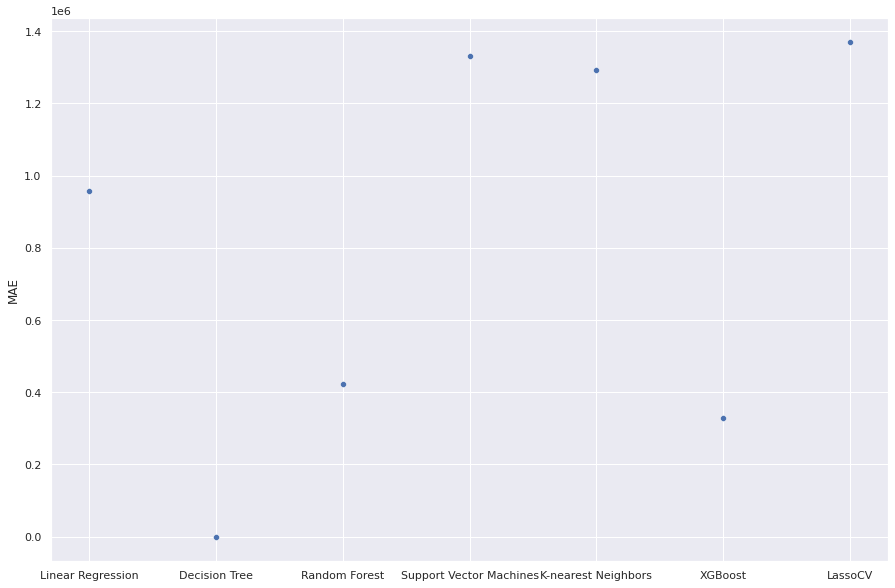

In [199]:
# Plot graph for various models 
fig=plt.gcf()
fig.set_size_inches(15,10)
sns.scatterplot(regression_models.keys(),model_score["MAE"])

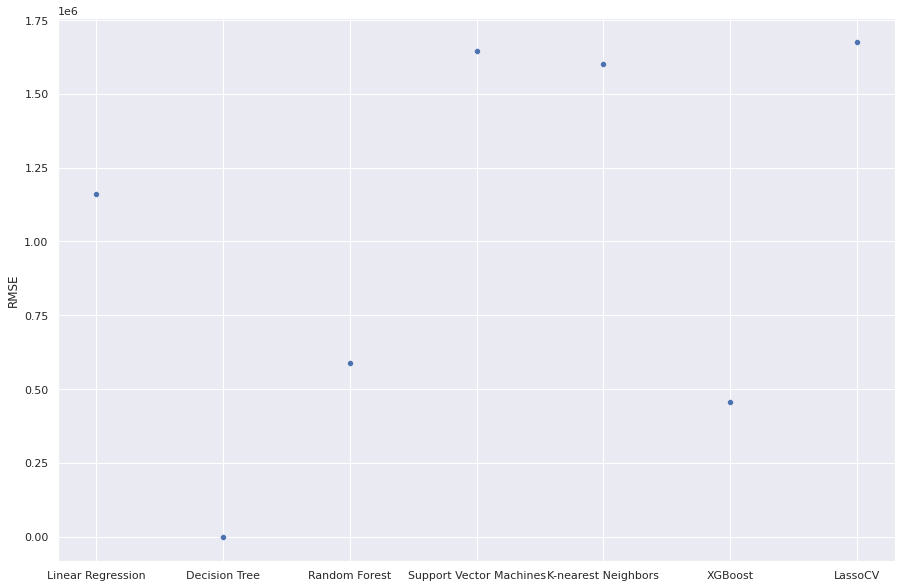

In [200]:
# Plot graph for various models 
fig=plt.gcf()
fig.set_size_inches(15,10)
sns.scatterplot(regression_models.keys(),model_score["RMSE"])

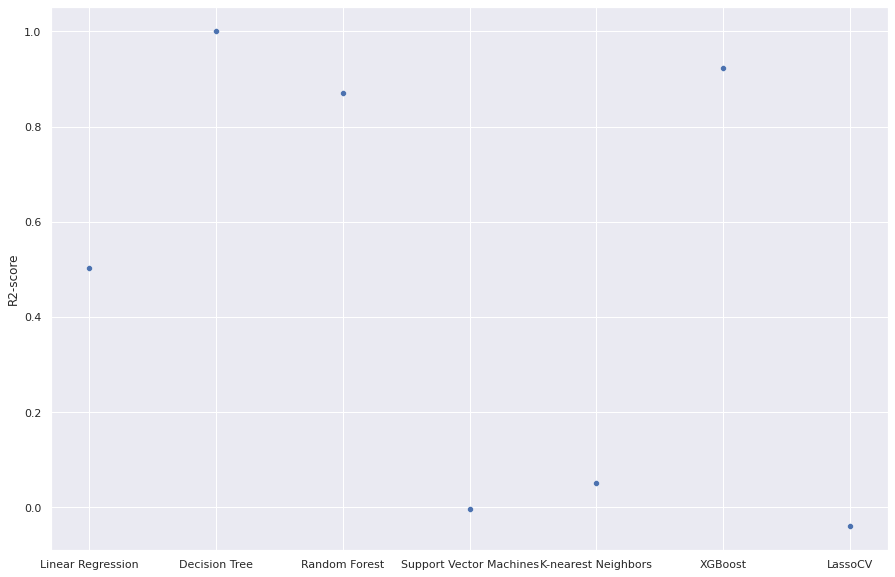

In [201]:
# Plot graph for various models 
fig=plt.gcf()
fig.set_size_inches(15,10)
sns.scatterplot(regression_models.keys(),model_score["R2-score"])

## Step 5: Final Model Selection and Fine Tuning 
### In this step we will conclude the final model selection and get the score from competition.
* RMSE ( Root Mean Square Error) and MSE(Mean Square Error) are measurement for regression model evaluation. RMSE and MSE both gives difference between your model predication and actual value. Larger the value of RMSE and MSE indicates poor performance of your model.
* Similarly, R2 Score is another indication for regression model evaluation,Higher the R2 score, Better the model performance.
  * By formula R2 = 1 - (RSS/TSS)
  where RSS sum of square of residuals and TSS is total sum.
* Based on model scores between various models, Decision tree has highest r2 score (1.0) compare to other models, It has also 0 MAE and 0 RMSE errors. So we may think to select Decision Tree model. BUT the perfect score on training data leads to **Overfitting** problem, where model performs great on training data but production data, it performs poorly. 
* We need to select more generalized model. So here we will select **Random Forest** based regressor as it has good R2 score and relatively good RMSE and MSE. 
* We may select **XGBoost** based regressor as well, but Random Forest will generalized more.

In [202]:
# Now tune the final model by using grid search

rfr = RandomForestRegressor()
tunning_values = {'n_estimators':[100,150,200,250,500],'max_features':["auto","sqrt","log2"]}
grs = GridSearchCV(rfr, tunning_values)
grs.fit(X,y)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [203]:
# get the best fine tuned params
grs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [205]:
# define the best fine tuned model
final_model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# get the mse score for fine tunel final model

final_model.fit(X,y)
pred = final_model.predict(X_test)
mean_absolute_error(y_test,pred)

496000.9293064285

In [206]:
# Now predict and get submission.csv 
real_prediction = final_model.predict(test_df)
real_prediction

array([4248689.13575546, 3798672.67373851, 3621326.74432509, ...,
       4090955.06155757, 4433262.03930719, 4894927.25228272])

In [207]:
# create submission.csv for upload.
y1 = pd.DataFrame(real_prediction)
test_framew =pd.concat([test_df,y1],axis=1)
test_framew.rename(columns={0:"Prediction"},inplace=True)
test_framew

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Open Days,City_Ankara,City_Antalya,City_Bursa,City_Other,City_Sakarya,City_Samsun,City_İstanbul,City_İzmir,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL,Type_MB,Prediction
0,1,4,4,4,1,2,5,4,5,5,5,3,4,0,0,0,2,0,5,5,3,1,4,0,0,0,0,2,3,0,0,0,0,0,0,0,0,1712,0,0,0,1,0,0,0,0,0,1,0,1,0,0,4.248689e+06
1,3,4,4,4,2,2,5,3,4,4,2,4,5,0,0,0,0,0,5,5,3,2,1,0,0,0,0,1,3,0,0,0,0,0,0,0,0,1657,0,0,0,1,0,0,0,0,0,1,0,0,1,0,3.798673e+06
2,3,4,4,4,2,2,5,4,4,5,4,5,5,0,0,0,0,0,5,5,5,5,5,0,0,0,0,2,3,0,0,0,0,0,0,0,0,700,1,0,0,0,0,0,0,0,1,0,0,1,0,0,3.621327e+06
3,2,4,4,4,2,3,5,4,5,4,3,4,5,0,0,0,0,4,4,4,3,2,2,0,0,0,0,2,3,0,4,0,0,0,0,0,0,877,0,0,0,1,0,0,0,0,0,1,0,0,1,0,3.593859e+06
4,2,4,4,4,1,2,5,4,5,4,3,5,4,0,0,0,0,0,1,5,3,1,1,0,0,0,0,5,3,0,0,0,0,0,0,0,0,791,0,0,0,1,0,0,0,0,0,1,0,1,0,0,4.154775e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,5,4,4,2,2,5,5,4,4,4,4,4,0,0,0,0,0,3,1,1,3,2,0,0,0,0,2,3,0,0,0,0,0,0,0,0,5747,0,1,0,0,0,0,0,0,0,1,0,1,0,0,4.328758e+06
99996,1,2,4,3,1,1,1,5,5,5,2,4,5,0,0,0,1,0,1,1,1,1,2,0,0,0,0,1,3,5,0,0,0,4,0,0,0,1535,0,0,0,1,0,0,0,0,0,1,0,0,1,0,3.024328e+06
99997,4,5,4,4,1,2,5,3,4,5,5,4,5,0,4,4,3,3,3,5,4,5,5,4,4,4,3,4,1,5,5,3,2,4,4,4,2,1005,0,0,0,0,0,0,1,0,1,0,0,0,1,0,4.090955e+06
99998,12,7,6,6,4,4,10,10,10,10,6,10,7,0,0,0,0,0,20,9,3,3,15,0,2,0,0,7,5,0,0,0,4,0,0,0,0,718,0,0,0,0,0,0,1,0,1,0,0,1,0,0,4.433262e+06


In [ ]:
# export file to csv
test_framew.to_csv("sampleSubmission.csv",columns=["Prediction"],index=True)

# download file
from google.colab import files
files.download("sampleSubmission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Final Conclusion
* We can not use the deep learning methods for this model as data is scarce, just 137 sample of training data which is prune to overfitting when we use deep neural network. so this model is based on traditional ML regression methods. 
* After fine tuning model, we have created sampleSubmission.csv file, we upload to kaggle competition for testing model performance in production.
* This model is standing in TOP 150 out of 2250 participants( Ranked 132/2250).
* The main steps for project which made differently 1) removing outliers 2) one hot encoding of categorical features 3) Fill missing training data by using KNN.  4) Model selection and Fine tuning.
* Top Scorer has RMSE around 1727K this model has RMSE about 1792K which indicates this model is production ready model.